Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347078323364
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349734067917
Epoch: 70 and loss: 0.12165626138448715
Epoch: 80 and loss: 0.08606515824794769
Epoch: 90 and loss: 0.06522617489099503
1.)  tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.)  tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.)  tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.)  tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.)  tensor([-7.1838,  4.8757,  8.3024]) 	 2 	 2
6.)  tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.)  tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.)  tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.)  tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.)  tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.)  tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.)  tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.)  tensor([ 4.2

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

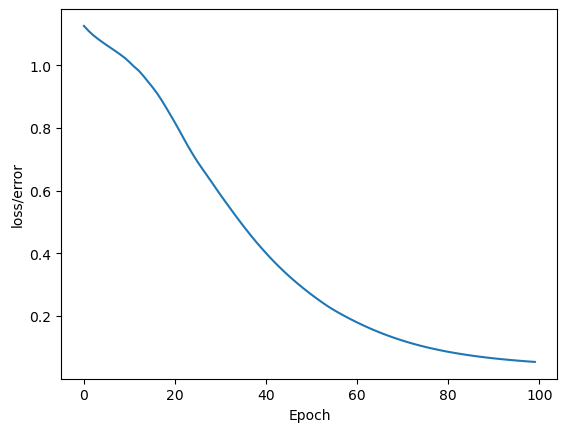

In [10]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
import torch
import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
 
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

torch.manual_seed(41)

model = Model()
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

my_df = pd.read_csv(url)

my_df.tail()


my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

X = my_df.drop('variety', axis=1)
y = my_df['variety']

X = X.values
y = y.values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

loss
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris))
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model(newer_iris))
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))
# Make sure it loaded correctly
new_model.eval()
